link to notebook shortcut cheat sheet:
https://towardsdatascience.com/jypyter-notebook-shortcuts-bf0101a98330

Welcome to the time series and seismogram analysis course.
In this Jupyter notebook you will find material for the University Pedagogy 2.1 Teaching Demo.

Let's get started. In the Code cells containing "In [ ]:" you find statements that execute Python programming sequences. To execute a statement, click on the Cell, modify if needed, and press CTRL+ENTER (run selected cells) or SHIFT+ENTER (run the current cell, select below).

Here is some basic math:

In [2]:
 2 * 1 + 2**3

10

The "import" stuff loads some of the many (MANY!) available toolboxes and makes the functions available. Let's start with some trigonometry.

In [3]:
import numpy as np
pi = np.pi
pi

3.141592653589793

That value is available in all following cells:

In [4]:
pi

3.141592653589793

In [5]:
angle = np.sin(pi/2)
angle

1.0

The next statement loads some plotting library, and we then plot some trigonometric functions.

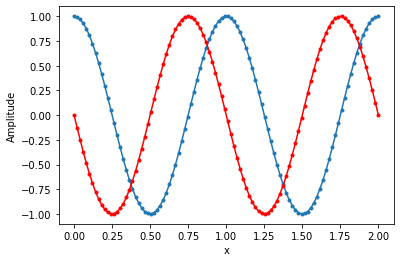

In [6]:
import matplotlib.pyplot as plt
# next is a magic line that makes graphics appear in browser
%matplotlib inline  
x = np.linspace(0,4*pi,100) # make 100 samples-long vector between 0 and 4pi
A = np.cos(x) # take the cosine, A is also 100 samples-long
plt.plot(x/2/pi,A,'.-') # plot A(time) with solid line and a dot for each sample

# play with the phase---i.e., 
# what part (peak, trough) of the function (or wave) is where when
# (use values in radian, e.g., 0, pi/2, pi, 2pi/3, ...)
phase = pi/2
A = np.cos(x + phase) # take the cosine, A is also 100 samples-long
plt.plot(x/2/pi,A,'r.-')

# get used to proper labeling
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.show()

We build some insight into the decomposition of a sinusoidal wave with arbitrary phase into a superposition of sine and cosine function.

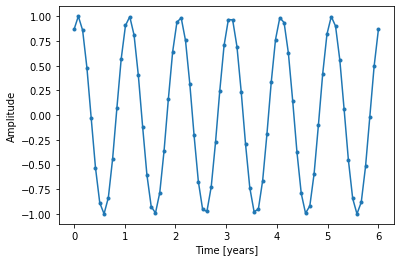

In [7]:
N = 6 * 12 # we build a time series of length 10 years with one sample per day
t = np.linspace(0,2*pi*6,N) # this is the time vector
A = 1 # arbitrary amplitude value
phi = pi/3 # introduce some phase shift
d = A * np.sin(t+phi)

plt.plot(t/2/pi,d,'.-')
plt.xlabel('Time [years]')
plt.ylabel('Amplitude')
plt.show()

In [8]:
# build model vectors based on sine and cosine functions
model_sin = np.sin(t) # row vector
model_cos = np.cos(t) # row vector
GT = np.concatenate(([model_sin], [model_cos])) # shape (2,N), the transposed way
G = GT.T # shape (N,2)
# np.linalg.lstsq: Return the least-squares solution to a linear matrix equation.
# the function returns 4 items => [0] means we only want the first split into alpha, beta
alpha, beta = np.linalg.lstsq(np.matmul(GT,G),np.matmul(GT,d),rcond=None)[0]
# alpha and beta are the weights of the sine and cosine basis function
print("The sine- and cosine-weights are %5.3f, %5.3f"%(alpha, beta))

The sine- and cosine-weights are 0.500, 0.866


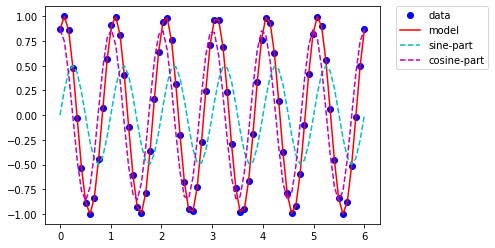

Phase of data: 1.047; estimated phase: 1.047, 1.047


In [9]:
# build model, plot, and report results
model = alpha * model_sin + beta * model_cos
plt.plot(t/2/pi,d,'bo',label='data') # data
plt.plot(t/2/pi,model,'r',label='model') # the model
plt.plot(t/2/pi,alpha*model_sin,'c--',label='sine-part') # the sine part of the model
plt.plot(t/2/pi,beta*model_cos,'m--',label='cosine-part') # the cosine part of the model
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# estimate the phase (2 possible ways)
phi_alpha = np.arccos(alpha/A)
phi_beta = np.arcsin(beta/A)
plt.show()
print("Phase of data: %5.3f; estimated phase: %5.3f, %5.3f"%(phi,phi_alpha,phi_beta))

We read a seismogram from a 2-column ascii file. The first column contains the timing and the second column the amplitude information.

In [10]:
data_time, data_A = np.loadtxt('waveform.txt',unpack=True)
data_time

array([0.00000e+00, 2.50000e-03, 5.00000e-03, ..., 2.99950e+01,
       2.99975e+01, 3.00000e+01])

In [11]:
data_A

array([-8.537079e-08, -8.563284e-08, -8.541360e-08, ...,  1.306440e-07,
        1.304440e-07,  1.303328e-07])

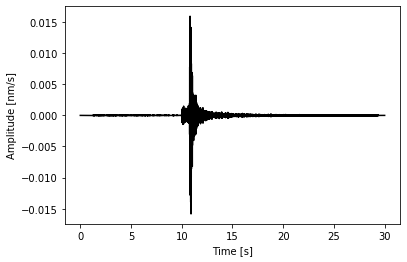

In [12]:
plt.plot(data_time,data_A,'k')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [nm/s]')
plt.show()